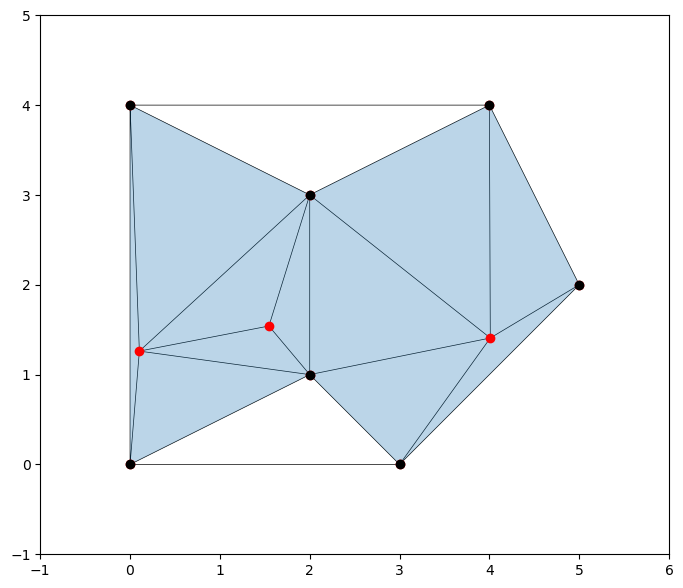

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from shapely.geometry import Point, Polygon
from shapely.geometry.polygon import LinearRing
import random

# Function to check if a point is inside a polygon
def is_point_in_polygon(point, polygon):
    return polygon.contains(point)

# Create a complex shape using Shapely
boundary_points = [
    (0, 0), (2, 1), (3, 0), (5, 2), (4, 4), (2, 3), (0, 4)
]
polygon = Polygon(boundary_points)

# Generate random points inside the shape
num_points = 3
points = []
while len(points) < num_points:
    random_point = Point(random.uniform(0, 5), random.uniform(0, 4))
    if is_point_in_polygon(random_point, polygon):
        points.append([random_point.x, random_point.y])

points = np.array(points + boundary_points)
boundary_points = np.array(boundary_points)
# Create Delaunay triangulation
tri = Delaunay(points)

# Plot the triangulated shape
plt.figure(figsize=(10, 7))
plt.triplot(points[:, 0], points[:, 1], tri.simplices, color='k', lw=0.5)
plt.plot(points[:, 0], points[:, 1], 'o', color='red')
plt.plot(boundary_points[:, 0], boundary_points[:, 1], 'o', color='black')

plt.fill(*polygon.exterior.xy, alpha=0.3)
plt.xlim(-1, 6)
plt.ylim(-1, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


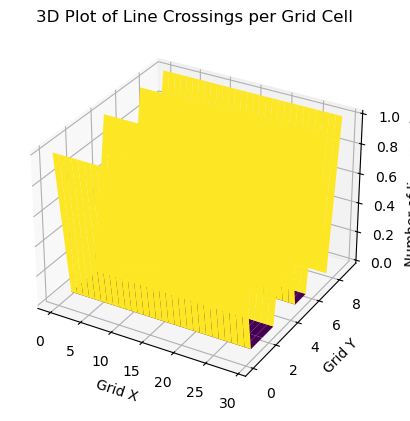

Grid with line crossing counts:
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1.]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def device_location(n, rows, new_min=0.1, new_max=29.9, linear=False):
    if linear:
        return np.linspace(new_min, new_max, n)
    else:
        return np.sort(np.random.uniform(new_min, new_max, n))

# Define the grid size
grid_width = 1
grid_height = 1

# Define the rectangle dimensions
rect_width = 30
rect_height = 10

# Define the number of devices and rows
num_devices = 20
rows = rect_height
cols = rect_width

# Generate device locations
z = device_location(n=num_devices, rows=rows, new_min=0.1, new_max=29.9, linear=False)

# Define sources and receivers
sources = [(0, i) for i in z]
receivers = [(cols, i) for i in z]

# Define the lines as tuples (x1, y1, x2, y2) between sources and receivers
lines = [(src[0], src[1], rcv[0], rcv[1]) for src, rcv in zip(sources, receivers)]

# Create a grid
num_bins_x = rect_width // grid_width
num_bins_y = rect_height // grid_height
grid = np.zeros((num_bins_y, num_bins_x))

# Function to check if a line crosses a grid cell
def line_crosses_grid_cell(x1, y1, x2, y2, cell_x, cell_y, cell_width, cell_height):
    # Check if the line crosses the boundaries of the cell
    return not (x1 < cell_x and x2 < cell_x or x1 > cell_x + cell_width and x2 > cell_x + cell_width or
                y1 < cell_y and y2 < cell_y or y1 > cell_y + cell_height and y2 > cell_y + cell_height)

# Count the crossings
for line in lines:
    x1, y1, x2, y2 = line
    for i in range(num_bins_x):
        for j in range(num_bins_y):
            cell_x = i * grid_width
            cell_y = j * grid_height
            if line_crosses_grid_cell(x1, y1, x2, y2, cell_x, cell_y, grid_width, grid_height):
                grid[j, i] += 1

# Create a 3D plot
x = np.arange(0, num_bins_x)
y = np.arange(0, num_bins_y)
x, y = np.meshgrid(x, y)
z = grid

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

ax.set_xlabel('Grid X')
ax.set_ylabel('Grid Y')
ax.set_zlabel('Number of line crossings')
ax.set_title('3D Plot of Line Crossings per Grid Cell')

plt.show()

print("Grid with line crossing counts:")
print(grid)
